<a href="https://colab.research.google.com/github/snr131/Personal-projects/blob/Peloton-metrics/Peloton_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Has my indoor cycling performance improved over time?

I purchased a Peloton bike during the summer of 2020. Prior to this purchase I wasn't much of an indoor cycling enthusiast. And when I received the bike I found the workouts to be HARD. While I appreciate the leaderboard as a form of motivation, I found that in comparison to others in my age group and who identify as the same gender as me, are much faster! I'm curious, has my performance improved over time?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('/content/drive/MyDrive/School/Microcredential/Tableau/snr131_workouts.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Workout Timestamp   247 non-null    object 
 1   Live/On-Demand      247 non-null    object 
 2   Instructor Name     246 non-null    object 
 3   Length (minutes)    247 non-null    int64  
 4   Fitness Discipline  247 non-null    object 
 5   Type                247 non-null    object 
 6   Title               247 non-null    object 
 7   Class Timestamp     246 non-null    object 
 8   Total Output        56 non-null     float64
 9   Avg. Watts          49 non-null     float64
 10  Avg. Resistance     49 non-null     object 
 11  Avg. Cadence (RPM)  49 non-null     float64
 12  Avg. Speed (mph)    56 non-null     float64
 13  Distance (mi)       56 non-null     float64
 14  Calories Burned     243 non-null    float64
 15  Avg. Heartrate      0 non-null      float64
 16  Avg. Inc

Right away I know I want to limit my analysis to on-demand classes. I've attended only two live classes, one of which was at the Peloton studio in 2016. Additionally, I take several on-demand strength/stretch classes per month and I want to exclude those from my analysis.

In [4]:
df.head()

,Workout Timestamp,Live/On-Demand,Instructor Name,Length (minutes),Fitness Discipline,Type,Title,Class Timestamp,Total Output,Avg. Watts,Avg. Resistance,Avg. Cadence (RPM),Avg. Speed (mph),Distance (mi),Calories Burned,Avg. Heartrate,Avg. Incline,Avg. Pace (min/mi)
0,2016-05-23 13:30 (UTC),Live,Alex Toussaint,45,Cycling,Music,45 min Top Hits Ride,2016-05-23 13:15 (UTC),150.0,56.0,35%,63.0,12.35,9.26,347.0,NaN,NaN,NaN
1,2020-04-05 16:46 (UTC),On Demand,Olivia Amato,10,Strength,Bodyweight,10 min Bodyweight Strength,2020-03-10 12:31 (UTC),NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
2,2020-04-11 17:33 (UTC),On Demand,Becs Gentry,10,Strength,Bodyweight,10 min Bodyweight Strength,2020-03-30 15:17 (UTC),NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN
3,2020-04-12 14:42 (UTC),On Demand,Olivia Amato,10,Strength,Bodyweight,10 min Bodyweight Strength,2020-03-10 12:31 (UTC),NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN
4,2020-05-03 15:56 (EST),On Demand,Andy Speer,30,Strength,Upper Body,30 min Upper Body: Live from Home,2020-05-01 11:25 (EST),NaN,NaN,NaN,NaN,NaN,NaN,148.0,NaN,NaN,NaN


In [5]:
df['Fitness Discipline'].value_counts()

Strength         164
Cycling           49
Stretching        17
Cardio             9
Bike Bootcamp      7
Yoga               1
Name: Fitness Discipline, dtype: int64

In [6]:
df.groupby(by=['Live/On-Demand'])['Fitness Discipline'].value_counts()

Live/On-Demand  Fitness Discipline
Live            Cycling                 2
On Demand       Strength              164
                Cycling                47
                Stretching             17
                Cardio                  9
                Bike Bootcamp           7
                Yoga                    1
Name: Fitness Discipline, dtype: int64

In [7]:
on_demand_cycling = df.loc[(df['Live/On-Demand']=='On Demand') & (df['Fitness Discipline']=='Cycling')]

In [8]:
on_demand_cycling.head()

,Workout Timestamp,Live/On-Demand,Instructor Name,Length (minutes),Fitness Discipline,Type,Title,Class Timestamp,Total Output,Avg. Watts,Avg. Resistance,Avg. Cadence (RPM),Avg. Speed (mph),Distance (mi),Calories Burned,Avg. Heartrate,Avg. Incline,Avg. Pace (min/mi)
49,2020-09-16 20:20 (EST),On Demand,Alex Toussaint,20,Cycling,Music,20 min Hip Hop Ride,2020-06-06 16:00 (EST),77.0,64.0,33%,77.0,13.39,4.46,106.0,NaN,NaN,NaN
50,2020-09-17 05:37 (EST),On Demand,Alex Toussaint,30,Cycling,Music,30 min Hip Hop Ride,2020-08-31 19:21 (EST),100.0,56.0,32%,75.0,12.45,6.23,138.0,NaN,NaN,NaN
51,2020-09-18 05:21 (EST),On Demand,Alex Toussaint,30,Cycling,Theme,30 min Club Bangers Ride,2020-08-25 11:17 (EST),130.0,73.0,37%,71.0,13.88,6.94,180.0,NaN,NaN,NaN
53,2020-09-24 13:09 (EST),On Demand,Alex Toussaint,20,Cycling,Low Impact,20 min Low Impact Ride,2020-07-27 18:45 (EST),81.0,67.0,31%,85.0,13.61,4.54,111.0,NaN,NaN,NaN
54,2020-09-26 12:55 (EST),On Demand,Tunde Oyeneyin,20,Cycling,Music,20 min Hip Hop Ride,2020-09-24 17:00 (EST),89.0,74.0,34%,82.0,14.11,4.70,123.0,NaN,NaN,NaN


Because I am taking these classes on demand, the workout timestamp is significant, whereas the class timestamp is not. Because I have not imput my height, weight, heartrate, etc, the calories burned is not an accurate calculation. Finally, the average incline and pace are treadmill metrics. Thus, all of these columns can be dropped.

In [9]:
on_demand_cycling.drop(['Class Timestamp', 'Calories Burned', 'Avg. Heartrate', 'Avg. Incline', 'Avg. Pace (min/mi)'], axis = 1, inplace=True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
on_demand_cycling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 49 to 245
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Workout Timestamp   47 non-null     object 
 1   Live/On-Demand      47 non-null     object 
 2   Instructor Name     46 non-null     object 
 3   Length (minutes)    47 non-null     int64  
 4   Fitness Discipline  47 non-null     object 
 5   Type                47 non-null     object 
 6   Title               47 non-null     object 
 7   Total Output        47 non-null     float64
 8   Avg. Watts          47 non-null     float64
 9   Avg. Resistance     47 non-null     object 
 10  Avg. Cadence (RPM)  47 non-null     float64
 11  Avg. Speed (mph)    47 non-null     float64
 12  Distance (mi)       47 non-null     float64
dtypes: float64(5), int64(1), object(7)
memory usage: 5.1+ KB


In [11]:
type(on_demand_cycling['Workout Timestamp'].iloc[0])

str

The workout timestamp is currently a string, and contains information like EST that will prevent conversion to a pandas datetime format without first stripping the unnecessary portions of that string.

In [12]:
on_demand_cycling['Workout Timestamp'] = on_demand_cycling['Workout Timestamp'].map(lambda x: x.rstrip('(EST)'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
on_demand_cycling['Workout Timestamp'] = on_demand_cycling['Workout Timestamp'].map(lambda x: x.rstrip('(UST)'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
on_demand_cycling['Workout Timestamp'] = on_demand_cycling['Workout Timestamp'].map(lambda x: x.rstrip('(-05'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
on_demand_cycling.head()

,Workout Timestamp,Live/On-Demand,Instructor Name,Length (minutes),Fitness Discipline,Type,Title,Total Output,Avg. Watts,Avg. Resistance,Avg. Cadence (RPM),Avg. Speed (mph),Distance (mi)
49,2020-09-16 20:20,On Demand,Alex Toussaint,20,Cycling,Music,20 min Hip Hop Ride,77.0,64.0,33%,77.0,13.39,4.46
50,2020-09-17 05:37,On Demand,Alex Toussaint,30,Cycling,Music,30 min Hip Hop Ride,100.0,56.0,32%,75.0,12.45,6.23
51,2020-09-18 05:21,On Demand,Alex Toussaint,30,Cycling,Theme,30 min Club Bangers Ride,130.0,73.0,37%,71.0,13.88,6.94
53,2020-09-24 13:09,On Demand,Alex Toussaint,20,Cycling,Low Impact,20 min Low Impact Ride,81.0,67.0,31%,85.0,13.61,4.54
54,2020-09-26 12:55,On Demand,Tunde Oyeneyin,20,Cycling,Music,20 min Hip Hop Ride,89.0,74.0,34%,82.0,14.11,4.70


To start, I'll use average watts as a measurement of my overall performance. Watts are calculated using cadence and resistance as inputs. Total output (calculated using watts) will increase as class length increases, and because I'd like to consider how my average watts fluctuate in classes of various lengths, I won't consider total output for now.

(array([737690., 737699., 737720., 737730., 737751., 737760., 737781.,
        737791., 737812., 737822.]),
 <a list of 10 Text major ticklabel objects>)

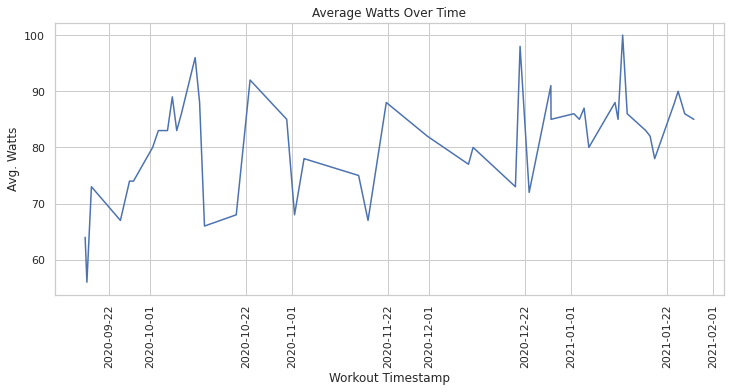

In [24]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (12, 5))
sns.lineplot(data = on_demand_cycling.reset_index(), x = 'Workout Timestamp', y = 'Avg. Watts' ).set_title('Average Watts Over Time')
plt.xticks(rotation=90)

My average watts does seem to be improving over time! How does day of the week and hour of the day impact my performance?

In [16]:
on_demand_cycling['Workout Timestamp'] = pd.to_datetime(on_demand_cycling['Workout Timestamp'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


I'd like to consider how the hour of the day and the day of the week impact my performance.

In [17]:
on_demand_cycling['Hour'] = on_demand_cycling['Workout Timestamp'].apply(lambda time: time.hour)
on_demand_cycling['Day of Week'] = on_demand_cycling['Workout Timestamp'].apply(lambda time: time.dayofweek)
on_demand_cycling['Month'] = on_demand_cycling['Workout Timestamp'].apply(lambda time: time.month)
on_demand_cycling['Year'] = on_demand_cycling['Workout Timestamp'].apply(lambda time: time.year)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [18]:
on_demand_cycling.head()

,Workout Timestamp,Live/On-Demand,Instructor Name,Length (minutes),Fitness Discipline,Type,Title,Total Output,Avg. Watts,Avg. Resistance,Avg. Cadence (RPM),Avg. Speed (mph),Distance (mi),Hour,Day of Week,Month,Year
49,2020-09-16 20:20:00,On Demand,Alex Toussaint,20,Cycling,Music,20 min Hip Hop Ride,77.0,64.0,33%,77.0,13.39,4.46,20,2,9,2020
50,2020-09-17 05:37:00,On Demand,Alex Toussaint,30,Cycling,Music,30 min Hip Hop Ride,100.0,56.0,32%,75.0,12.45,6.23,5,3,9,2020
51,2020-09-18 05:21:00,On Demand,Alex Toussaint,30,Cycling,Theme,30 min Club Bangers Ride,130.0,73.0,37%,71.0,13.88,6.94,5,4,9,2020
53,2020-09-24 13:09:00,On Demand,Alex Toussaint,20,Cycling,Low Impact,20 min Low Impact Ride,81.0,67.0,31%,85.0,13.61,4.54,13,3,9,2020
54,2020-09-26 12:55:00,On Demand,Tunde Oyeneyin,20,Cycling,Music,20 min Hip Hop Ride,89.0,74.0,34%,82.0,14.11,4.70,12,5,9,2020


In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [21]:
on_demand_cycling['Day of Week'] = on_demand_cycling['Day of Week'].map(dmap)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
on_demand_cycling.head()

,Workout Timestamp,Live/On-Demand,Instructor Name,Length (minutes),Fitness Discipline,Type,Title,Total Output,Avg. Watts,Avg. Resistance,Avg. Cadence (RPM),Avg. Speed (mph),Distance (mi),Hour,Day of Week,Month,Year
49,2020-09-16 20:20:00,On Demand,Alex Toussaint,20,Cycling,Music,20 min Hip Hop Ride,77.0,64.0,33%,77.0,13.39,4.46,20,Wed,9,2020
50,2020-09-17 05:37:00,On Demand,Alex Toussaint,30,Cycling,Music,30 min Hip Hop Ride,100.0,56.0,32%,75.0,12.45,6.23,5,Thu,9,2020
51,2020-09-18 05:21:00,On Demand,Alex Toussaint,30,Cycling,Theme,30 min Club Bangers Ride,130.0,73.0,37%,71.0,13.88,6.94,5,Fri,9,2020
53,2020-09-24 13:09:00,On Demand,Alex Toussaint,20,Cycling,Low Impact,20 min Low Impact Ride,81.0,67.0,31%,85.0,13.61,4.54,13,Thu,9,2020
54,2020-09-26 12:55:00,On Demand,Tunde Oyeneyin,20,Cycling,Music,20 min Hip Hop Ride,89.0,74.0,34%,82.0,14.11,4.70,12,Sat,9,2020


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

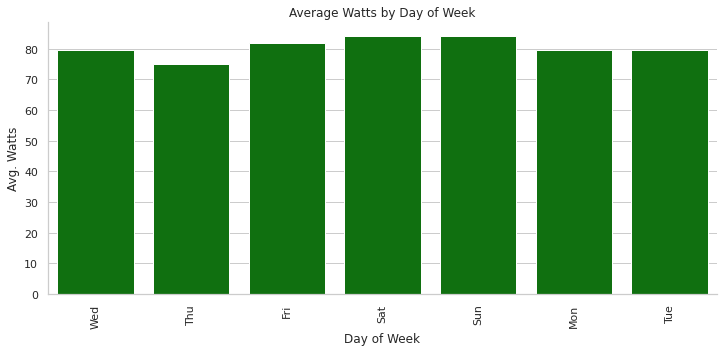

In [35]:
plt.figure(figsize = (12, 5))
sns.barplot(x=on_demand_cycling['Day of Week'], y=on_demand_cycling['Avg. Watts'], data=on_demand_cycling, ci=False, color="green").set_title('Average Watts by Day of Week')
sns.despine()
plt.xticks(rotation=90)

It doesn't appear the day of the week has any signficant impact on my average watts, though my performance is slightly better during weekends.

In [26]:
on_demand_cycling['Day of Week'].value_counts()

Sun    12
Mon     8
Tue     7
Sat     6
Thu     5
Wed     5
Fri     4
Name: Day of Week, dtype: int64

In [28]:
on_demand_cycling['Hour'].value_counts()

20    10
13    10
5      7
19     5
14     4
18     3
21     2
15     2
12     1
9      1
7      1
6      1
Name: Hour, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

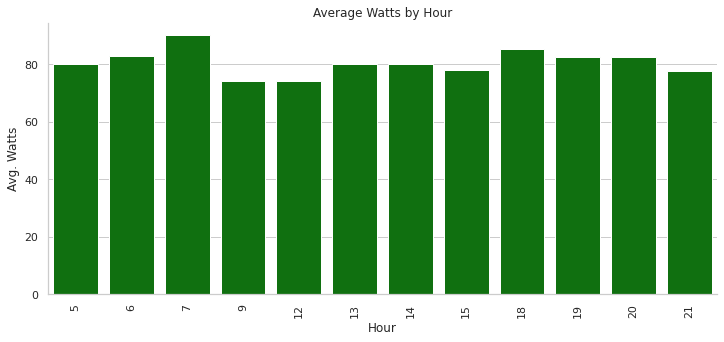

In [29]:
plt.figure(figsize = (12, 5))
sns.barplot(x=on_demand_cycling['Hour'], y=on_demand_cycling['Avg. Watts'], data=on_demand_cycling, ci=False, color="green").set_title('Average Watts by Hour')
sns.despine()
plt.xticks(rotation=90)

It doesn't appear the time of day has any signficant impact on my average watts, though my performance is slightly better at 7am.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

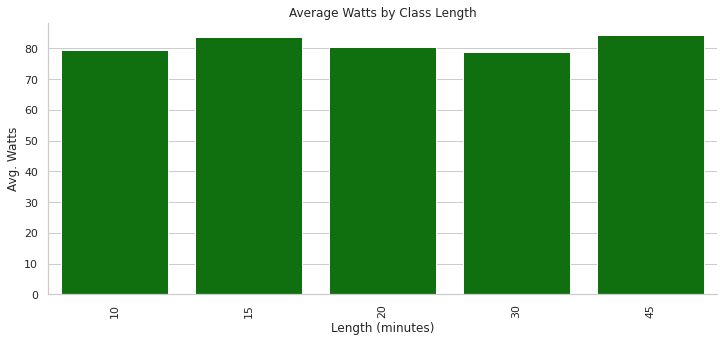

In [37]:
plt.figure(figsize = (12, 5))
sns.barplot(x=on_demand_cycling['Length (minutes)'], y=on_demand_cycling['Avg. Watts'], data=on_demand_cycling, ci=False, color="green").set_title('Average Watts by Class Length')
sns.despine()
plt.xticks(rotation=90)

It doesn't appear the class length of day has any signficant impact on my average watts, though my performance is slightly better during 15 and 45 minute rides.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

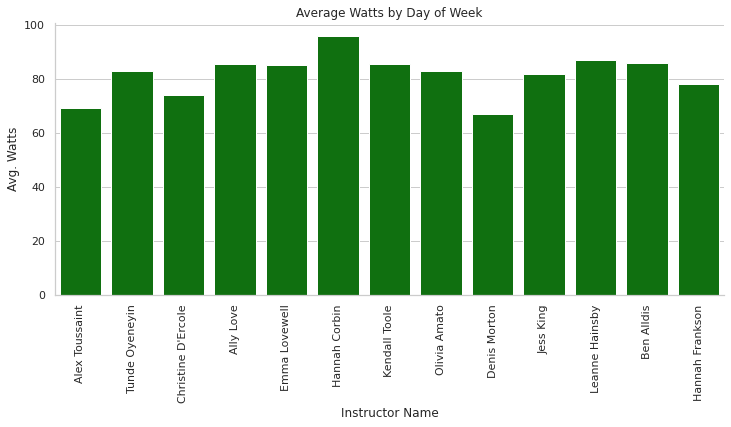

In [27]:
plt.figure(figsize = (12, 5))
sns.barplot(x=on_demand_cycling['Instructor Name'], y=on_demand_cycling['Avg. Watts'], data=on_demand_cycling, ci=False, color="green").set_title('Average Watts by Day of Week')
sns.despine()
plt.xticks(rotation=90)

My average watts are highest when I ride with Hannah Corbin!